In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.svm import LinearSVC as svc

Import necessary libraries in cell above

In [3]:
df = pd.read_csv('data/data_v7.csv')
df.head()

,t1_general_traditional_WIN%,t1_general_traditional_PTS,t1_general_traditional_FGM,t1_general_traditional_FG%,t1_general_traditional_3PM,t1_general_traditional_3P%,t1_general_traditional_FTM,t1_general_traditional_FT%,t1_general_traditional_OREB,t1_general_traditional_DREB,...,t2_clutch-opponent_Opponent's Assists,t2_clutch-opponent_Opponent's Turnovers,t2_clutch-opponent_Opponent's Steals,t2_clutch-opponent_Opponent's Blocks,t2_clutch-opponent_Opponent's Blocked Field Goal Attempts,t2_clutch-opponent_Opponent's Personal Fouls,t2_clutch-opponent_Opponent's Personal Fouls Drawn,t2_clutch-opponent_Opponent's Points,t2_seed,outcome
0,56.1,91.9,34.1,43.1,4.1,34.6,19.5,74.5,12.6,31.8,...,1.2,1.2,0.6,0.5,0.3,2.7,2.1,7.4,3.0,1.0
1,63.4,100.7,38.0,45.8,6.9,37.9,18.0,78.7,11.9,30.5,...,1.6,1.2,0.6,0.4,0.5,2.5,3.1,8.8,7.0,1.0
2,50.0,92.6,34.5,44.0,4.8,34.2,18.8,76.6,11.2,31.6,...,1.7,1.1,0.6,0.5,0.6,3.3,2.5,8.2,1.0,0.0
3,58.5,88.7,33.6,44.4,4.8,35.1,16.8,79.6,9.4,30.8,...,1.2,1.0,0.5,0.4,0.4,2.2,2.6,7.6,5.0,0.0
4,64.6,100.5,37.6,45.9,6.3,38.1,18.9,79.4,10.1,31.4,...,0.8,0.7,0.5,0.2,0.3,2.9,2.2,6.9,4.0,1.0


In [4]:
X = df.drop(columns=['outcome']).to_numpy()
y = df['outcome']

xtrain, xtest, ytrain, ytest = train_test_split(X,y)

np.savetxt('v7_xtrain.csv',xtrain,delimiter=',')
np.savetxt('v7_ytrain.csv',ytrain,delimiter=',')
np.savetxt('v7_xtest.csv',xtest,delimiter=',')
np.savetxt('v7_ytest.csv',ytest,delimiter=',')

In cell above, split v7 of data into train and testing sets and then save them so we can reproduce results

# Read in train and test sets (start)

In [2]:
xtrain = pd.read_csv('data/v7_xtrain.csv',header=None)
xtest = pd.read_csv('data/v7_xtest.csv',header=None)
ytrain = pd.read_csv('data/v7_ytrain.csv',header=None)
ytest = pd.read_csv('data/v7_ytest.csv', header=None)

In [3]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,48.298668,95.922267,35.126605,44.106616,5.804666,32.987968,19.908923,76.215188,12.276506,31.656430,...,3.578253,1.463004,1.168787,0.605102,0.636246,0.437150,2.517972,1.599363,7.308319,2.139220
1,63.668381,100.906406,38.720775,46.674725,7.198402,36.935280,16.291757,77.346547,10.955249,30.350992,...,3.261566,1.043260,0.875331,0.436005,0.409027,0.330687,2.871563,2.606850,8.387039,2.801931
2,67.914538,103.612571,39.835779,47.471098,6.044021,35.920624,17.940756,72.703503,12.409791,32.567111,...,4.002015,1.646192,1.239359,0.657569,0.498403,0.545964,2.537598,2.349254,8.476908,9.945259
3,62.047247,99.291945,36.760528,46.180489,7.214588,34.272725,18.491879,78.563310,8.612511,31.348554,...,3.321917,1.112033,0.979387,0.459813,0.382557,0.601029,2.286574,2.109450,8.251681,1.915625
4,62.636895,114.691369,40.993902,47.363683,13.191561,36.457766,19.495495,79.728334,9.101419,36.372938,...,3.437961,1.424602,1.380376,0.551851,0.166005,0.518096,2.384959,2.141095,7.619295,1.098011


In [4]:
ytrain.head()

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [5]:
xtest.head()

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,60.887232,80.842182,29.193940,41.904516,1.734329,34.243323,20.662469,75.593336,11.387147,29.526855,...,3.107618,1.139043,1.151061,0.822623,0.443669,0.548788,2.642894,2.379563,6.985259,1.871021
1,57.499223,106.554299,39.705637,44.837956,8.542881,34.033044,18.463123,78.078425,12.112769,34.237731,...,2.832082,1.143784,0.997891,0.477665,0.364067,0.389060,2.317955,1.844243,7.108452,1.200597
2,63.332348,104.086857,39.448339,47.025229,8.021212,36.244669,17.265216,77.259782,10.050964,31.991133,...,2.157560,1.093197,0.658132,0.383123,0.339716,0.254544,1.439031,1.693405,6.018548,0.561885
3,57.485269,105.401391,39.901375,47.388928,5.696495,32.853173,19.998115,74.719971,11.598969,33.318915,...,3.964035,1.343380,1.311374,0.510596,0.469658,0.630527,2.580202,2.418875,8.955652,1.047712
4,75.939341,103.134854,38.147067,47.213120,9.380947,38.716685,17.529196,76.459063,9.275777,33.019430,...,3.720961,1.163395,0.893811,0.343422,0.404943,0.354054,2.267162,2.460069,9.183832,5.500841


In [6]:
ytest.head()

,0
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0


In [7]:
xtrain = xtrain.to_numpy()
xtest = xtest.to_numpy()
ytrain = ytrain.to_numpy()
ytest = ytest.to_numpy()

# End

# Define accuracy function

In [8]:
def accuracy(y1, y2):
    cor = 0
    for i in range(y1.shape[0]):
        if y1[i] == y2[i]:
            cor+=1
    return cor/y1.shape[0]

# End

In [6]:
#vanilla Gaussian Naive Bayes classifier

nb_clf = GaussianNB()
nb_clf.fit(xtrain, ytrain)
test_preds = nb_clf.predict(xtest)
train_preds = nb_clf.predict(xtrain)
print('train acc:',accuracy(ytrain.to_numpy(),train_preds),sep=' ')
print('test acc:',accuracy(ytest.to_numpy(),test_preds),sep=' ')

train acc: 0.8059530623926732
test acc: 0.7632933104631218


In [7]:
#vanilla KNN classifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain, ytrain)
test_preds = knn_clf.predict(xtest)
train_preds = knn_clf.predict(xtrain)
print('train acc:',accuracy(ytrain.to_numpy(),train_preds),sep=' ')
print('test acc:',accuracy(ytest.to_numpy(),test_preds),sep=' ')

train acc: 0.8082427017744706
test acc: 0.6449399656946827


In [8]:
#vanilla Random Forest classifier

rfc_clf = RandomForestClassifier()
rfc_clf.fit(xtrain,ytrain)
test_preds = rfc_clf.predict(xtest)
train_preds = rfc_clf.predict(xtrain)
print('train acc:',accuracy(ytrain.to_numpy(),train_preds),sep=' ')
print('test acc:',accuracy(ytest.to_numpy(),test_preds),sep=' ')

train acc: 1.0
test acc: 0.8284734133790738


In [9]:
#vanilla Logistic Regression classifier 

lr_clf = LogisticRegression()
lr_clf.fit(xtrain,ytrain)
test_preds = lr_clf.predict(xtest)
train_preds = lr_clf.predict(xtrain)
print('train acc:',accuracy(ytrain.to_numpy(),train_preds),sep=' ')
print('test acc:',accuracy(ytest.to_numpy(),test_preds),sep=' ')

train acc: 0.813966800228964
test acc: 0.79073756432247


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Let's determine optimal hyperparameters for RFC

In [38]:
train_acc = []
test_acc = []
trees = np.arange(10,310,10)
maxdepth = len(df.columns)-1
depth_arr = np.arange(5,maxdepth,10)
xdata = []
ydata = []

for depth in depth_arr:
    for num_trees in trees:
        rfc_clf = RandomForestClassifier(n_estimators=num_trees,max_depth=depth,random_state=0)
        rfc_clf.fit(xtrain,ytrain)
        test_acc.append(accuracy(ytest.to_numpy(),rfc_clf.predict(xtest)))
        train_acc.append(accuracy(ytrain.to_numpy(),rfc_clf.predict(xtrain)))
        xdata.append(depth)
        ydata.append(num_trees)

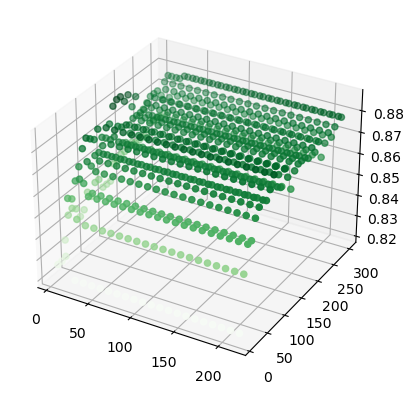

In [43]:
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, test_acc, c=test_acc, cmap='Greens');

looks like the more number of trees the better and, after 30-40 or so, adding to the max depth of the tree is inconsequential; let the optimal number of trees be 275

# Optimal RFC below on v7 data

In [15]:
rfc_clf = RandomForestClassifier(n_estimators=275,random_state=0)
rfc_clf.fit(xtrain,ytrain)
print(accuracy(ytest.reshape(-1),rfc_clf.predict(xtest)))
print(accuracy(ytrain.reshape(-1),rfc_clf.predict(xtrain)))

/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_72149/2926153266.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_clf.fit(xtrain,ytrain)


0.8387650085763293
1.0


# End

# Let's determine optimal number of estimators when using bagging for Logistic Regression

In [13]:
bag = BaggingClassifier(estimator=LogisticRegression())  #will see performance of Vanilla Bagged LR first
bag.fit(xtrain,ytrain)
print(accuracy(bag.predict(xtest),ytest.to_numpy()))
print(accuracy(bag.predict(xtrain),ytrain.to_numpy()))

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.8010291595197255
0.8099599313108186


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [14]:
x = np.arange(5,55,5)
test_acc = []
train_acc = []
for num_est in x:
    bag = BaggingClassifier(estimator=LogisticRegression(),n_estimators=num_est, random_state=0) 
    bag.fit(xtrain,ytrain)
    test_acc.append(accuracy(bag.predict(xtest),ytest.to_numpy()))
    train_acc.append(accuracy(bag.predict(xtrain),ytrain.to_numpy()))

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [15]:
max(train_acc)

0.8105323411562679

In [16]:
max(test_acc)

0.7975986277873071

In [17]:
x[np.argmax(test_acc)]

5

Optimal number of estimators for bagged LR is 5 based on test accuracy

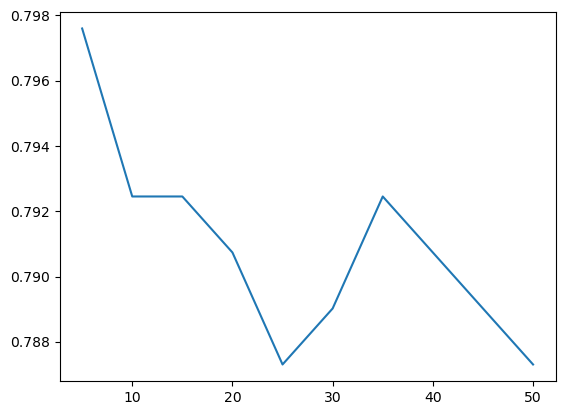

In [19]:
plt.plot(x,test_acc)

# Optimal bagged LR

In [20]:
bag = BaggingClassifier(estimator=LogisticRegression(),n_estimators=5, random_state=0) 
bag.fit(xtrain,ytrain.reshape(-1))
print(accuracy(bag.predict(xtest),ytest.reshape(-1)))
print(accuracy(bag.predict(xtrain),ytrain.reshape(-1)))

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.7958833619210978
0.8065254722381225


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# End

In [21]:
#Vanilla SVM (linear kernel)

svm_clf = svc()
svm_clf.fit(xtrain,ytrain)
print(accuracy(svm_clf.predict(xtrain),ytrain.to_numpy()))
print(accuracy(svm_clf.predict(xtest),ytest.to_numpy()))

0.5042930738408701
0.5523156089193825


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
#SVM (linear kernel) with hinge loss

svm_clf = svc(loss='hinge', random_state=0, max_iter=500000)
svm_clf.fit(xtrain,ytrain)
print(accuracy(svm_clf.predict(xtrain),ytrain.to_numpy()))
print(accuracy(svm_clf.predict(xtest),ytest.to_numpy()))

0.8088151116199198
0.7924528301886793


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


note, increasing max iterations is leading to better and better results even if we are not converging

# Let's determine the optimal hyperparameters for the SVM

In [31]:
const = np.arange(0.01,1.05,0.05)
train_acc = []
test_acc = []

for c in const:
    print(c)
    svm_clf = svc(loss='hinge',C=c, random_state=0, max_iter=500000)
    svm_clf.fit(xtrain,ytrain)
    train_acc.append(accuracy(svm_clf.predict(xtrain),ytrain.to_numpy()))
    test_acc.append(accuracy(svm_clf.predict(xtest),ytest.to_numpy()))

0.01


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.060000000000000005


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.11


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.16000000000000003


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.21000000000000002


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.26


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.31000000000000005


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.36000000000000004


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.41000000000000003


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.46


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.51


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.56


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6100000000000001


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.66


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7100000000000001


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.76


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.81


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8600000000000001


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.91


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9600000000000001


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.01


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
const[np.argmax(test_acc)]

0.01

# Optimal SVM

In [22]:
svm_clf = svc(loss='hinge',C=.01, random_state=0, max_iter=500000)
svm_clf.fit(xtrain,ytrain.reshape(-1))
print(accuracy(svm_clf.predict(xtrain),ytrain.reshape(-1)))
print(accuracy(svm_clf.predict(xtest),ytest.reshape(-1)))

0.8168288494562106
0.7993138936535163


/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# End

# Principal Component Analysis

In [23]:
#PCA projects data onto a lower dimensional linear subspace which simulataneously minimizes reconstruction error and 
#maximizes variance of the projected data when expressed wrt the orthongonal basis of the linear subspace.

# We need to choose the dimension of the linear subspace onto which we project the data. We can use performance on
#the test set to understand what dimension is best for our task. 

#Test set performance will vary from model to model and model parameter settings to setting. 

# For each dimension, for each model, find optimal parameters for the model's hyperparameters. For each dimension,
#average the models' performance on the test set when using its optimal hyperparameters. Choose dimension with 
#highest average performance and for that dimension choose model with best performance OR choose dimension and model with highest performance 
#across all dimension-model combinations

In [10]:
import math
ncols = xtrain.shape[1]
min_comps = 0.5*math.floor(ncols)
max_comps = ncols

bagged_lr_dict = {}
svm_dict = {}
rfc_dict = {}

In [15]:
import time
comps_arr = np.arange(int(min_comps),max_comps+1,4)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)

    for comps in comps_arr:
        print(comps*100/ncols)
        pca = PCA(n_components=comps, random_state=0)
        pca.fit(xtrain)
        pca_xtrain = pca.transform(xtrain)
        pca_xtest = pca.transform(xtest)
        
        #Bagged LR
        estimators = np.arange(5,55,5)
        acc_list = []
        for ests in estimators:
            bag = BaggingClassifier(estimator=LogisticRegression(max_iter=10000),n_estimators=ests, random_state=0) 
            bag.fit(pca_xtrain,ytrain.reshape(-1))
            acc_list.append(accuracy(ytest.reshape(-1),bag.predict(pca_xtest)))
        bagged_lr_dict[comps] = (estimators[np.argmax(acc_list)],max(acc_list))
        
        time.sleep(10)
        
        #RFC
        trees = np.arange(10,310,10)
        acc_list = []
        for ntrees in trees:
            rfc_clf = RandomForestClassifier(n_estimators=ntrees,random_state=0)
            rfc_clf.fit(pca_xtrain,ytrain.reshape(-1))
            acc_list.append(accuracy(ytest.reshape(-1),rfc_clf.predict(pca_xtest)))
        rfc_dict[comps] = (trees[np.argmax(acc_list)],max(acc_list))
        
        time.sleep(10)
        
        #SVM
        const = np.arange(0.01,1.05,0.05)
        acc_list = []
        for c in const:
            svm_clf = svc(loss='hinge',C=c, random_state=0, max_iter=5000)
            svm_clf.fit(pca_xtrain,ytrain.reshape(-1))
            acc_list.append(accuracy(ytest.reshape(-1),svm_clf.predict(pca_xtest)))
        svm_dict[comps] = (const[np.argmax(acc_list)],max(acc_list))
        
        time.sleep(10)
        
           


50.0
51.8348623853211
53.669724770642205
55.5045871559633
57.3394495412844
59.174311926605505
61.00917431192661
62.84403669724771
64.6788990825688
66.5137614678899
68.34862385321101
70.18348623853211
72.01834862385321
73.85321100917432
75.68807339449542
77.5229357798165
79.35779816513761
81.19266055045871
83.02752293577981
84.86238532110092
86.69724770642202
88.53211009174312
90.36697247706422
92.20183486238533
94.03669724770643
95.87155963302752
97.70642201834862
99.54128440366972


In [16]:
bagged_lr_dict

{109: (40, 0.8490566037735849),
 113: (40, 0.855917667238422),
 117: (5, 0.855917667238422),
 121: (15, 0.855917667238422),
 125: (5, 0.855917667238422),
 129: (50, 0.8610634648370498),
 133: (5, 0.8644939965694682),
 137: (5, 0.8679245283018868),
 141: (5, 0.869639794168096),
 145: (10, 0.8730703259005146),
 149: (10, 0.8765008576329331),
 153: (10, 0.8799313893653516),
 157: (40, 0.8816466552315609),
 161: (10, 0.8799313893653516),
 165: (10, 0.8799313893653516),
 169: (15, 0.8799313893653516),
 173: (20, 0.8799313893653516),
 177: (20, 0.8799313893653516),
 181: (15, 0.8799313893653516),
 185: (15, 0.8816466552315609),
 189: (15, 0.8816466552315609),
 193: (15, 0.8816466552315609),
 197: (15, 0.8816466552315609),
 201: (15, 0.8816466552315609),
 205: (15, 0.8816466552315609),
 209: (15, 0.8816466552315609),
 213: (15, 0.8816466552315609),
 217: (15, 0.8816466552315609)}

In [19]:
best_comps = 0
best_acc = 0
best_est_num = 0
for key, val in bagged_lr_dict.items():
    if val[1] > best_acc:
        best_acc = val[1]
        best_est_num  = val[0]
        best_comps = key

blr_comps = best_comps
blr_acc = best_acc
blr_ests = best_est_num    

In [17]:
svm_dict

{109: (0.16000000000000003, 0.8284734133790738),
 113: (0.060000000000000005, 0.8387650085763293),
 117: (0.11, 0.8370497427101201),
 121: (0.21000000000000002, 0.8421955403087479),
 125: (0.41000000000000003, 0.8370497427101201),
 129: (0.26, 0.8353344768439108),
 133: (0.21000000000000002, 0.8439108061749572),
 137: (0.21000000000000002, 0.8507718696397941),
 141: (0.36000000000000004, 0.8404802744425386),
 145: (0.6100000000000001, 0.8439108061749572),
 149: (0.51, 0.8524871355060034),
 153: (0.31000000000000005, 0.8644939965694682),
 157: (0.21000000000000002, 0.8507718696397941),
 161: (0.6100000000000001, 0.8473413379073756),
 165: (0.36000000000000004, 0.855917667238422),
 169: (0.46, 0.8507718696397941),
 173: (0.26, 0.8456260720411664),
 177: (0.41000000000000003, 0.855917667238422),
 181: (0.26, 0.8610634648370498),
 185: (0.31000000000000005, 0.855917667238422),
 189: (0.41000000000000003, 0.8542024013722127),
 193: (0.56, 0.8610634648370498),
 197: (0.56, 0.8610634648370498

In [20]:
best_comps = 0
best_acc = 0
best_reg = 0
for key, val in svm_dict.items():
    if val[1] > best_acc:
        best_acc = val[1]
        best_reg  = val[0]
        best_comps = key

svm_comps = best_comps
svm_acc = best_acc
svm_reg = best_reg  

In [18]:
rfc_dict

{109: (290, 0.9433962264150944),
 113: (250, 0.9245283018867925),
 117: (300, 0.9228130360205832),
 121: (210, 0.9313893653516295),
 125: (220, 0.9279588336192109),
 129: (230, 0.9365351629502573),
 133: (290, 0.934819897084048),
 137: (220, 0.9399656946826758),
 141: (240, 0.9519725557461407),
 145: (270, 0.9451114922813036),
 149: (290, 0.9485420240137221),
 153: (290, 0.9485420240137221),
 157: (260, 0.9554030874785592),
 161: (220, 0.9519725557461407),
 165: (300, 0.9519725557461407),
 169: (290, 0.9468267581475128),
 173: (300, 0.9519725557461407),
 177: (230, 0.9742710120068611),
 181: (240, 0.9588336192109777),
 185: (230, 0.9536878216123499),
 189: (290, 0.9605488850771869),
 193: (290, 0.9622641509433962),
 197: (270, 0.967409948542024),
 201: (280, 0.9571183533447685),
 205: (280, 0.9794168096054888),
 209: (280, 0.9725557461406518),
 213: (290, 0.9811320754716981),
 217: (270, 0.9691252144082333)}

In [21]:
best_comps = 0
best_acc = 0
best_tree_num = 0
for key, val in rfc_dict.items():
    if val[1] > best_acc:
        best_acc = val[1]
        best_tree_num  = val[0]
        best_comps = key

rfc_comps = best_comps
rfc_acc = best_acc
rfc_trees = best_tree_num 

In [22]:
print(blr_comps,blr_ests,blr_acc)

157 40 0.8816466552315609


In [23]:
print(svm_comps, svm_reg, svm_acc)

153 0.31000000000000005 0.8644939965694682


In [24]:
print(rfc_comps, rfc_trees, rfc_acc)

213 290 0.9811320754716981


# End